#### Linjär regression på en variabel

Vi kommer här att titta på endast en av x-variablerna (_Geometric_), då vi tidigare konstaterat att det finns hög grad av beroende mellan de olika x-variablerna, och därför blir den förra modellen otillförlitlig.

Många av beräkningarna blir likadana som i första exemplet, och vi utför dem därför lite "fler åt gången".

In [10]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import LR

data_path = "Small-diameter-flow.csv"
df = pd.read_csv(data_path, index_col=0)

y = df["Flow"]
X = np.column_stack([np.ones(y.shape[0]), df['Geometric']])


Nu söker vi alltså ett linjärt samband på formen
$$
y=\beta_0 + \beta_1 [Geometric]
$$


In [11]:

m = LR.LinearRegression(X, y)
b = m.fit()
print(f"Vi får β0 = {b[0]:.7f}, β1 = {b[1]:.7f}")


Vi får β0 = 5.3323804, β1 = 3.2400047


Vi noterar speciellt att $\beta_1$, alltså lutningsparametern för _Geometric_, blir 3.24, att jämföra med 3.61 från första försöket. (Det går förstås inte att jämföra rakt av, många andra faktorer spelar in, men kan ändå ge en fingervisning om hur lika eller olika modellerna blir.)

In [12]:
d = m.dimension(b)
n = m.sample_size(y)
print(f"d = {d}, n = {n}")

SSE = m.SSE(y, X, b)
var = m.variance(SSE, n, d)
print(f"Variansen är {var:.7f}")

S = m.deviation(var)
Syy = m.Syy(n, y)
SSR = m.SSR(Syy, SSE)
print(f"S = {S:.7f}, Syy = {Syy:.7f}, SSR = {SSR:.7f}")

d = 1, n = 198
Variansen är 0.0182068
S = 0.1349327, Syy = 425.1441930, SSR = 421.5756511


Nu testar vi att plotta _Geometric_ vs. _Flow_, tillsammans med vår modell, $\hat{y} = 5.33 + 3.24x$, för att se hur bra den verkar.

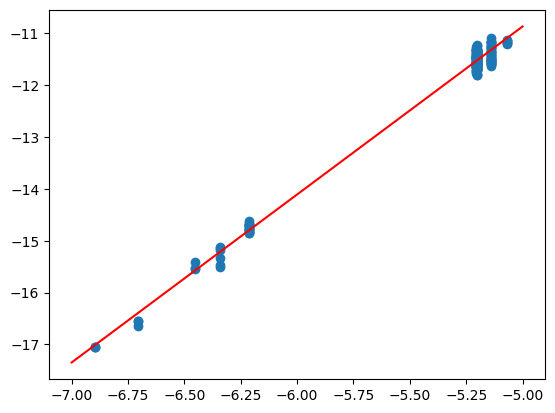

In [13]:
plt.scatter(X[:,1],y)
x = np.linspace(-7,-5)

y_hat=b[0]+b[1]*x
plt.plot(x, y_hat, c="red");

Vår modell (den röda linjen) ser ju i högsta grad relevant ut! Nu ska vi beräkna de andra statistikorna:

In [14]:
F = m.Fstatistic(SSR, d, var)
print(f"F = {F}")

Rsq = m.Rsq(SSR, Syy)
print(f"Rsq = {Rsq}")

c = m.var_covar(X, var)

sig=[]
for a in range(d+1):
    sig.append(m.significance(a,b,c,S))
for a in range(d+1):
    print(f"Relevanstest-värdet för β{a} är {m.relevance(sig, a, n, d)}")


F = 23154.78688791649
Rsq = 0.9916062785832102
Relevanstest-värdet för β0 är 1.788362326582224e-274
Relevanstest-värdet för β1 är 0.0


Återigen ett F-värde långt över 1, och ett $R^2$-värde nära 1, skvallrar om att modellen är tillförlitlig. Det är mer eller mindre klart att variansen inte beror på slumpen, utan kan förklaras av vår modell. Relevansvärdena (från det tvåsidiga relevanstestet) på i princip 0, gör också att vi kan dra slutsatsen att modellen är klart relevant.

Nu ska vi beräkna konfidensintervallen för $\beta_0$ och $\beta_1$, på samma sätt som i förra uppgiften:

In [17]:
print(f"t-värdet är {stats.t.ppf(1-0.05/2,n-d-1)}")
for a in range(d+1):
    ci=m.confidence_interval(n,d,var,c,a)
    print(f"Konfidensintervallet för β{a} på 95%-nivån är mellan {b[a]-ci:.8f} och {b[a]+ci:.8f}")


t-värdet är 1.9721412216594967
Konfidensintervallet för β0 på 95%-nivån är mellan 5.32825099 och 5.33650978
Konfidensintervallet för β1 på 95%-nivån är mellan 3.23924017 och 3.24076924


$t_{\alpha/2}$-värdet på ca 1,97 motsvarar alltså ungefär 2 standardavvikelser, så vi kan ge ovanstående mått på β-parametrarna med 95% säkerhet.

Så sammanfattningsvis: Om _Geometric_ hade varit den enda x-variabeln, så hade vi kunnat vara väldigt säkra på att vi tagit fram en bra modell. Men eftersom vi vet att det även fanns andra x-variabler som kunde påverka resultatet, så bör detta test betraktas mer som en "lägeskoll"; en modell (bland många andra) som kan testas i jakt på den allra bästa modellen. Något som dock är lite för tid- och utrymmeskrävande just nu.